In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ggp-test-log.txt')
df.head()

,tpgGen,envGen,frames,envName,tpgMin,tpgMax,tpgAvg
0,1,1,200,DoubleDunk-v0,-2.0,0.0,-0.216000
1,2,1,200,Bowling-v0,0.0,0.0,0.000000
2,3,1,200,Zaxxon-v0,0.0,0.0,0.000000
3,4,1,200,Alien-v0,0.0,140.0,67.406542
4,5,1,200,WizardOfWor-v0,0.0,0.0,0.000000


In [3]:
envDfs = []
for envName in pd.unique(df.envName):
    envDfs.append(df.loc[df['envName'] == envName])

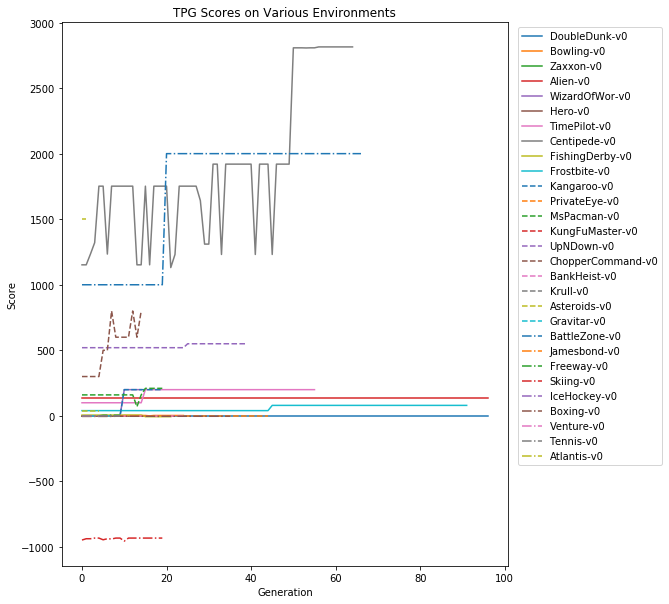

In [4]:
# 10 colors in cycle
plt.figure(figsize=(8,10))
cnt = 0
lineStyles = ['-', '--', '-.']
lsi = 0
for edf in envDfs:
    cnt += 1
    plt.plot(edf.tpgMax.tolist(), label=edf.envName.iloc[0], ls=lineStyles[lsi])
    if cnt == 10:
        cnt = 0
        lsi += 1
plt.legend(loc=2, bbox_to_anchor=(1.01, 1.0))
plt.xlabel('Generation')
plt.ylabel('Score')
plt.title('TPG Scores on Various Environments')
plt.show()